In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import csv

In [42]:
np.random.seed(7)

In [43]:
# load the dataset
dataframe = pandas.read_csv('aapl.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [44]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [45]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [46]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
lookback = 1
trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)

In [48]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [49]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
3s - loss: 0.0339
Epoch 2/100
2s - loss: 0.0025
Epoch 3/100
2s - loss: 3.1137e-04
Epoch 4/100
2s - loss: 2.7970e-04
Epoch 5/100
2s - loss: 2.7644e-04
Epoch 6/100
2s - loss: 2.8258e-04
Epoch 7/100
2s - loss: 2.8887e-04
Epoch 8/100
2s - loss: 2.8554e-04
Epoch 9/100
2s - loss: 2.7151e-04
Epoch 10/100
2s - loss: 2.7456e-04
Epoch 11/100
2s - loss: 2.8445e-04
Epoch 12/100
2s - loss: 2.7573e-04
Epoch 13/100
2s - loss: 2.7946e-04
Epoch 14/100
2s - loss: 2.7932e-04
Epoch 15/100
2s - loss: 2.7962e-04
Epoch 16/100
2s - loss: 2.7382e-04
Epoch 17/100
2s - loss: 2.7486e-04
Epoch 18/100
2s - loss: 2.7745e-04
Epoch 19/100
2s - loss: 2.8508e-04
Epoch 20/100
2s - loss: 2.7596e-04
Epoch 21/100
2s - loss: 2.7727e-04
Epoch 22/100
2s - loss: 2.7477e-04
Epoch 23/100
2s - loss: 2.8012e-04
Epoch 24/100
2s - loss: 2.6810e-04
Epoch 25/100
2s - loss: 2.8271e-04
Epoch 26/100
2s - loss: 2.7747e-04
Epoch 27/100
2s - loss: 2.7623e-04
Epoch 28/100
2s - loss: 2.8029e-04
Epoch 29/100
2s - loss: 2.7329e-04
Ep

In [50]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [51]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [52]:
ls = testPredict[:,0] - testY[0]

In [53]:
diff = np.zeros(10)
for i in range(len(testY[0])):
    diff[math.floor(math.fabs(ls[i]))] += 1
for i in range(len(diff)):
    if (i != 0):
        diff[i] = diff[i] + diff[i-1]

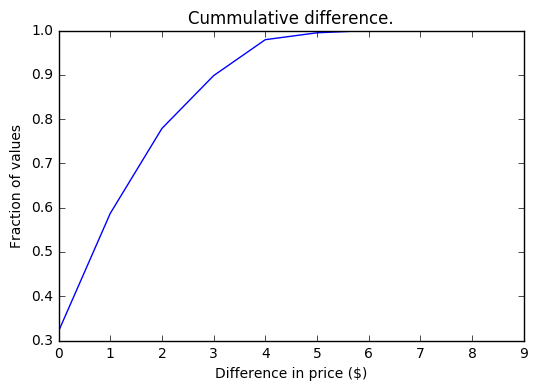

In [57]:
plt.title("Cummulative difference.")
plt.xlabel("Difference in price ($)")
plt.ylabel("Fraction of values")
plt.plot(diff/len(testY[0]))
plt.show()

In [55]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.86 RMSE
Test Score: 2.37 RMSE


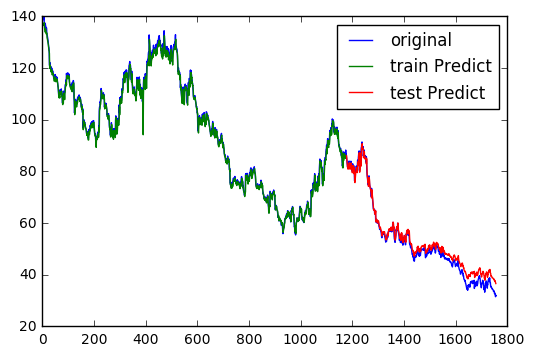

In [68]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='original')
plt.plot(trainPredictPlot, label='train Predict')
plt.plot(testPredictPlot, label='test Predict')
plt.legend()
plt.show()